In [4]:
import numpy as np
from sympy import *
from sympy.solvers import solve
import random
from qiskit import *
from qiskit import IBMQ
import pylatexenc
import scipy as sp
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import linalg as sla
from IPython.display import clear_output
from numpy import linalg as la
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit import Parameter
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.visualization import *
from operator import itemgetter
from functools import reduce

In [18]:
IBMQ.save_account('8b348610e213002b7703e139b265bc2f162c112104640fcb8af4557510b365d7a8114ceeb06c18b299b197d5acc68229ac9889f1a305905c64ba880256a5359b')
IBMQ.load_account()
provider = IBMQ.get_provider()

print(provider.backends())

backend = provider.get_backend('ibmq_qasm_simulator')

eTarget = -2

configrc.store_credentials:WARNING:2021-09-10 15:27:18,160: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2021-09-10 15:27:18,461: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') fro

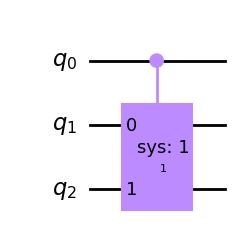

In [7]:
def make_cont_sys_circ(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(0, 1)
    temp.h(1)
    temp.sdg(0)
    temp.sdg(1)

    temp.rz(-2 * time, 0)
    temp.rz(-4 * time, 1)

    temp.s(0)
    temp.s(1)
    temp.h(1)
    temp.cx(0, 1)

    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return contTemp

test = QuantumCircuit(3)

test.append(make_cont_sys_circ(1), [0, 1, 2])

test.draw('mpl')

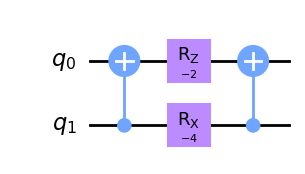

In [28]:
def make_cont_sys_circ2(inTime):
    time = Parameter('time')

    temp = QuantumCircuit(2)

    temp.cx(1, 0)

    temp.rx(-4 * time, 0)
    temp.rz(-2 * time, 1)

    temp.cx(1, 0)



    tempGate = temp.to_gate({time: inTime}, "sys: " + str(inTime))

    contTemp = tempGate.control(1)

    return contTemp

temp = QuantumCircuit(2)

temp.cx(1, 0)

temp.rx(-4 * 1, 1)
temp.rz(-2 * 1, 0)

temp.cx(1, 0)

temp.draw('mpl')

<ipython-input-9-f74779fc334a>:6: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  rodeo.u1(1*eTarget, 0)


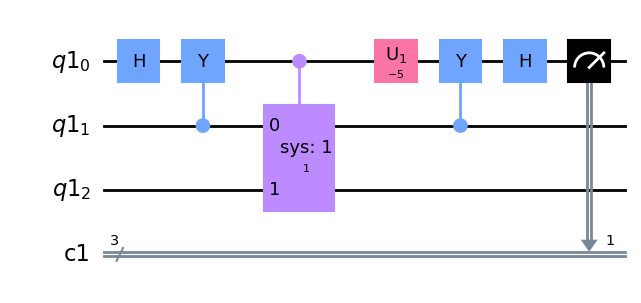

In [9]:
rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(3))

rodeo.h(0)
rodeo.cy(1, 0)
rodeo.append(make_cont_sys_circ(1), [0, 1, 2])
rodeo.u1(1*eTarget, 0)
rodeo.cy(1, 0)
rodeo.h(0)
rodeo.measure(0, 1)

rodeo.draw('mpl')

In [42]:
allData = list()
evenMoreData = list()
noYTest = list()
noYTestMore = list()
t1 = np.random.normal(0, 10)
t2 = np.random.normal(0, 10)
t3 = np.random.normal(0, 10)

t1
t2
t3

for i in Range(100):
    eTarget = i/10 - 5
    eTarget = float(eTarget)
    print(str(eTarget) + ": ")

    rodeo = QuantumCircuit(QuantumRegister(3), ClassicalRegister(3))

    #rodeo.h(1)
    #rodeo.cx(1, 2)

    rodeo.h(0)
    rodeo.cy(1, 0)
    rodeo.append(make_cont_sys_circ2(t1), [0, 1, 2])
    rodeo.u1(eTarget, 0)
    rodeo.cy(1, 0)
    rodeo.h(0)
    rodeo.measure(0, 0)

    rodeo.h(0)
    rodeo.cy(1, 0)
    rodeo.append(make_cont_sys_circ2(t2), [0, 1, 2])
    rodeo.u1(eTarget, 0)
    rodeo.cy(1, 0)
    rodeo.h(0)
    rodeo.measure(0, 1)

    rodeo.h(0)
    rodeo.cy(1, 0)
    rodeo.append(make_cont_sys_circ2(t3), [0, 1, 2])
    rodeo.u1(eTarget, 0)
    rodeo.cy(1, 0)
    rodeo.h(0)
    rodeo.measure(0, 2)

    job = execute(rodeo, backend=backend)
    job.wait_for_final_state()
    print(job.result().get_counts()['111'])
    noYTest.append(job.result().get_counts()['111'])
    noYTestMore.append(job.result().get_counts())

rodeo.draw('mpl')

-5.0: 
56
-4.9: 
41
-4.8: 
27
-4.7: 
25
-4.6: 
19
-4.5: 
22
-4.4: 
25
-4.3: 
49
-4.2: 
50
-4.1: 
64
-4.0: 
70
-3.9: 
87
-3.8: 
115
-3.7: 
101
-3.6: 
124
-3.5: 
115
-3.4: 
116
-3.3: 
110
-3.2: 
90
-3.1: 
90
-3.0: 
98
-2.9: 
63
-2.8: 
61
-2.7: 
45
-2.6: 
31
-2.5: 
26
-2.4: 
12
-2.3: 
15
-2.2: 
10
-2.1: 
6
-2.0: 
4
-1.9: 
1
-1.8: 


KeyError: '111'

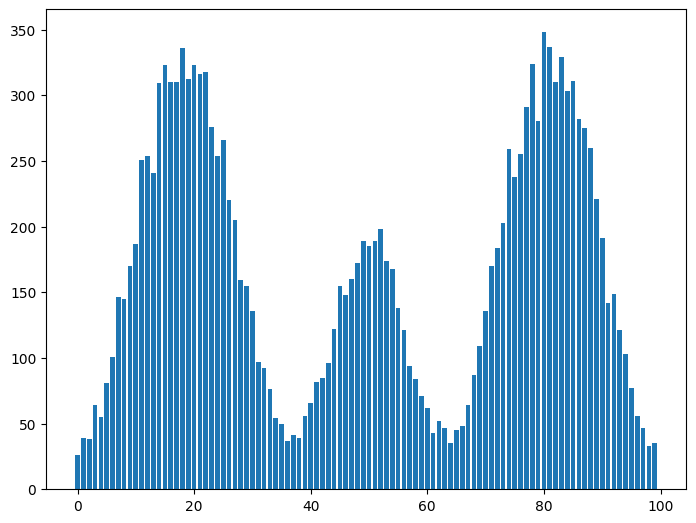

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
range = Range(100)
ax.bar(range, allData)
plt.show()

In [41]:
print(job.result().get_counts())

{'000': 97, '001': 4, '010': 183, '011': 6, '100': 483, '101': 1, '110': 249, '111': 1}


In [41]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
range2 = Range(100)
ax2.bar(range2, noYTest)
plt.show()
